In [264]:
import random
import numpy as np
import math

In [290]:
E = np.array([[1/6,1/6,1/6,1/6,1/6,1/6],[0.1,0.1,0.1,0.1,0.1,0.5]])
A = np.array([[0.95,0.05],[0.1,0.9]])
L = 300

In [291]:
#случайная последовательность при заданных параметрах E и A
def HMM(E, A, L):
    Path = np.zeros((L,), dtype=int)
    vec_sost = np.zeros((L,), dtype=int)
    s = stationary_distribution(A)

    #Случайным образом выбирается стратегия игры (d=0 fair P=2/3, d=1 unfair P=1/3)
    d_rand = np.random.random()
    if d_rand <= s[0]: d = 0
    else: d = 1
    vec_sost[0] = d
    
    if vec_sost[0] == 0:
        Path[0] = np.random.randint(1, 6)
    elif vec_sost[0] == 1:
        e_rand = np.random.random()
        if e_rand < 0.5:
            Path[0] = 6
        else:
            Path[0] = np.random.randint(1, 5)
    
    for i in range(1,L):
        a_rand = np.random.random()
        if (d == 0) and (a_rand <= 0.05): d = 1
        elif (d == 1) and (a_rand <= 0.1): d = 0
        
        if d == 0:
            vec_sost[i] = 0
            Path[i] = np.random.randint(1, 6)
        elif d == 1:
            vec_sost[i] = 1
            e_rand = np.random.random()
            if e_rand >= 0.5:
                Path[i] = 6
            else:
                Path[i] = np.random.randint(1, 5)
    return(Path, vec_sost)


Path, vec_sost = HMM(E, A, L)

print("Наблюдения:", Path, "Состояния: ", vec_sost, sep = '\n')

Наблюдения:
[6 2 3 3 1 6 6 6 4 2 6 4 6 6 2 2 1 1 5 4 2 2 3 2 4 1 5 4 5 2 2 5 4 3 5 1 6
 2 4 6 4 6 6 4 3 1 1 6 3 3 6 6 6 2 2 1 4 2 1 4 2 4 1 6 4 2 6 1 6 6 6 6 2 6
 1 6 1 1 5 4 4 3 2 6 1 1 5 3 4 2 6 6 3 4 4 2 2 3 2 4 1 2 2 3 4 2 4 3 6 2 6
 6 2 2 2 4 5 4 2 2 2 4 3 3 2 3 5 4 1 2 5 2 1 4 1 4 6 6 6 6 6 6 4 6 2 4 6 4
 6 6 2 4 6 6 4 1 2 2 6 6 2 6 4 1 6 2 6 6 1 3 2 6 4 6 6 2 4 3 1 5 2 4 4 1 4
 4 5 5 3 2 5 1 5 1 4 5 1 3 4 4 1 1 2 1 2 4 1 6 4 2 6 4 3 6 3 3 4 3 5 4 5 3
 4 4 3 4 3 1 3 3 3 4 4 1 5 1 3 4 4 3 3 3 1 4 1 5 5 2 3 1 3 4 2 4 1 1 5 4 3
 4 4 5 2 5 1 3 2 4 1 3 4 3 2 2 4 4 3 4 1 5 1 3 1 1 4 2 2 1 4 5 5 2 3 2 2 5
 5 2 3 1]
Состояния: 
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1
 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1
 1 1 0 1 0 0 0 0 1 1 0 0 0 0 1 1 1 1 1 0 0 0 1 1 1 1 1 0 0 0 0 0 0 1 1 1 1
 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0

# Viterbi

In [292]:
def viterby (Path, A,E):
    V_matr = np.zeros((2, L))
    s = stationary_distribution(A)
    P_matr = [[-1],[-1]]

    V_matr[0][0] = s[0]*E[0][Path[0]-1]
    V_matr[1][0] = s[1]*E[1][Path[0]-1]

    for i in range (1,L):
        for j in range(2):
            V_matr[j][i] = E[j][Path[i]-1]*max(A[0][j]*V_matr[0][i-1], A[1][j]*V_matr[1][i-1])
            P_matr[j].append(np.argmax([A[0][j]*V_matr[0][i-1], A[1][j]*V_matr[1][i-1]]))
    P_matr = np.array(P_matr)
    
    #Нахождение наиболее вероятной траектории:
    P_vec = np.zeros(L)
    P_vec[-1] = np.argmax([V_matr[0][-1],V_matr[1][-1]])
    for i in range(L-2,-1,-1):
        P_vec[i] = P_matr[int(P_vec[i+1])][i]
    return(P_vec)


def translation(l):
    L = len(l)
    c = ''
    dec = {0:'F', 1:'L'}
    for i in range(L):
        if l[i]!=-1:
            c += dec[l[i]]
        else:
            c += "o"
    return c

s=0
P_vec = viterby (Path, A,E)

for i in range(L):
    if translation(vec_sost)[i] == translation(P_vec)[i]:
        s+=1
print('\nЧастота совпадения:', s/L)


print(translation(vec_sost),"_"*100, translation(P_vec), sep='\n')


Частота совпадения: 0.8266666666666667
LLLLLLLLLLLLLLLFFFFFLFFFFFFFFFFFFFFFLLLLLLLLFFLLLLLLLFFFFFFFFFFLLLLLLLLLLLLLFLFFFFLLFFFFLLLLLFFFLLLLLFFFFFFLLLLLFFFFFFFFFFFFFFFFFFFFFFFLLLLLLLLLLLLLLLLLLLLLLLLLLLFFLLLLLLLLLLLLLFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFLLLLLLLFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFF
____________________________________________________________________________________________________
oLLLLLLLLLLLLLLFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFLLLLLLLLLLFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFLLLLLLLLLLLLLLLLLLLLLLLLLLLLLLLLLLLLLLLFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFF


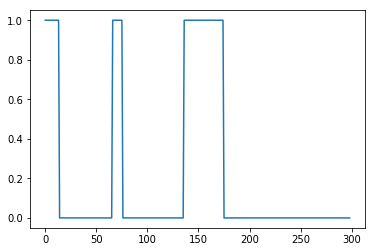

In [293]:
from pylab import *
plot(array(P_vec[1:]))
show()

# Forward

In [294]:
FV_matr = np.zeros((2, L))
m_F = np.zeros(L)
s = stationary_distribution(A)
FV_matr[0][0] = 1
FV_matr[1][0] = 1
FV_matr[0][1] = E[0][Path[0]-1]*s[0]
FV_matr[1][1] = E[1][Path[0]-1]*s[1]

for i in range (2,L):
    for j in range(2):        
        FV_matr[j][i] = E[j][Path[i-1]-1]*(A[0][j]*FV_matr[0][i-1] + A[1][j]*FV_matr[1][i-1])
    
    
        
#F_res = FV_matr[0][-1]*A[0][0] + FV_matr[1][-1]*A[1][0]
F_res = FV_matr[0][-1] + FV_matr[1][-1]
print(F_res)


9.761535455167552e-231


# Backward

In [295]:
BV_matr = np.zeros((2, L))
m_b = np.zeros(L)
s = stationary_distribution(A)
#BV_matr[0][-1]=A[0][0]
#BV_matr[1][-1]=A[1][0]
BV_matr[0][-1]=1
BV_matr[1][-1]=1
for i in range (L-2,-1,-1):
    for j in range(2):
        BV_matr[j][i] = A[j][0]*E[0][Path[i]-1]*BV_matr[0][i+1]+A[j][1]*E[1][Path[i]-1]*BV_matr[1][i+1]
    
    
    
B_res = BV_matr[0][0]*s[0] + BV_matr[1][0]*s[1]
#B_res = A[0][0]*E[0][Path[0]-1]*BV_matr[0][0] + A[0][1]*E[1][Path[0]-1]*BV_matr[1][0]
print(B_res)


9.761535455167678e-231


In [300]:
#Апостериорное дешифрование
def aposter(For_matr, Back_matr, L):
    apstr = np.zeros(L)
    for i in range(L):
        apstr[i] = (For_matr[0][i]*Back_matr[0][i])/(For_matr[0][-1] + For_matr[1][-1])
    return(apstr)


apstr = aposter(FV_matr, BV_matr, L)
print(apstr)

[0.75286421 0.47283467 0.52797286 0.53644892 0.50125607 0.40996639
 0.23034211 0.17672021 0.18344017 0.25873063 0.28130576 0.25913767
 0.30589572 0.30554554 0.38734368 0.65145277 0.79846558 0.8802978
 0.92584744 0.95119977 0.96530765 0.97315308 0.9775066  0.97990559
 0.98119722 0.98183761 0.98205292 0.98191916 0.98138912 0.9802756
 0.97818539 0.97438035 0.96751678 0.95517091 0.93298293 0.89311746
 0.8214965  0.69282804 0.6737342  0.61180431 0.48516861 0.46713193
 0.39830372 0.41332563 0.53059215 0.58421411 0.5931274  0.56047964
 0.47474169 0.48066436 0.4411733  0.34232274 0.33451068 0.40817117
 0.65350221 0.78946573 0.86407552 0.90367907 0.92226188 0.92638621
 0.91750854 0.89249382 0.84250841 0.74990063 0.58196719 0.54464527
 0.45173871 0.27043875 0.21828672 0.10019418 0.06274476 0.06008127
 0.08894225 0.18466824 0.22274275 0.36580371 0.43379197 0.66689725
 0.7959713  0.86659499 0.90370819 0.92041693 0.9226217  0.91110108
 0.88178671 0.91577539 0.93152076 0.93458308 0.9260438  0.902887